# Programming and Scripting Project
## Fisher's Iris Dataset
*Author: Eoghan Walsh*
***

This project uses python to generate histograms and scatter plots to visualize and investigate Fisher's Iris dataset.

The project provides python code to complete the following tasks:

1. Generate summary of the variables and output to .txt file.

2. Generate histograms of the variables and output to .png files.

3. Generate and output scatter plots of each pair of variables.

4. Generate and output scatter plots with regression line and coefficients.


## Import the Python Modules

Import the python modules [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/), [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/pyplot.html) and [seaborn](https://seaborn.pydata.org/index.html) to analyse and plot the data.

In [89]:
# Import python modules pandas, matplotlib.pyplot, seaborn and numpy.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the Iris Dataset

Load the dataset using pandas. The dataset is sourced from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris).

In [90]:
# Import the Iris data set to a pandas DataFrame and add column headers.
# Adapted from:
# https://sparkbyexamples.com/pandas/pandas-add-header-row-to-dataframe/.
column_names = ("sepal_length_cm", "sepal_width_cm", "petal_length_cm",
                "petal_width_cm", "class")

iris = pd.read_csv("iris.csv", names=column_names)

## About the Iris Dataset

[Fisher's Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), made famous by statistician Ronald Fisher, consists of 150 samples of Iris flower with fifty samples from each of three species: setosa, versicolor and virginica. There are four measurements from each flower: petal length, petal width, sepal length and sepal width.

In [91]:
# Show first 5 rows of the dataset.
iris.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [92]:
# Show the shape of the dataset.
print(f"Rows, Columns: {iris.shape}")

Rows, Columns: (150, 5)


In [93]:
# Show count of each species of iris.
iris["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Project

### 1. Output Summary of the Variables to a Text File

This function generates the below summary statistics for the four measurement variables in the dataset and outputs to a .txt file.

In [94]:
# 1. OUTPUT A SUMMARY OF EACH VARIABLE TO A SINGLE TEXT FILE.

# Create the filename.
FILENAME = "iris_variable_summary.txt"


# Function to write the summary stats to a text file.
def variable_summary():

    # Generate summary statistics for each variable and convert to string
    # so it can be written to a text file.
    # References:
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html.
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html.
    summary = iris.describe().to_csv()

    # Write summary statistics to txt file.
    with open(FILENAME, "w", newline="") as f:
        f.write(summary)


# Call the function.
variable_summary()

# Show the summary statistics.
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Save Histogram of Each Variable to a PNG File

This function generates a histogram for each measurement variable. A different colour has been assigned to each species of Iris.

In [95]:
# 2. SAVE A HISTOGRAM OF EACH VARIABLE TO PNG FILES.

# Function to save histograms to png files.
def histogram_png():

    # List of variables for the histograms.
    variables_hist = ("sepal_length_cm", "sepal_width_cm", "petal_length_cm",
                      "petal_width_cm")

    # Subsets of the data set by class.
    setosa_hist = iris["class"] == "Iris-setosa"
    versicolor_hist = iris["class"] == "Iris-versicolor"
    virginica_hist = iris["class"] == "Iris-virginica"

    # For loop to create histogram for each variable.
    for var in variables_hist:

        # Use matplotlib subplots to create the histogram.
        fig, ax = plt.subplots()

        # Select plot type, data, label, bar colour, transparency.
        ax.hist(iris[setosa_hist][var], label="setosa",
                color="tab:green", alpha=0.5)

        ax.hist(iris[versicolor_hist][var], label="versicolor",
                color="tab:orange", alpha=0.5)

        ax.hist(iris[virginica_hist][var], label="virginica",
                color="tab:blue", alpha=0.5)

        # Set the axis labels.
        x_label_hist = var.replace("_", " ").replace("cm", "(in centimetres)")
        ax.set_xlabel(x_label_hist)
        ax.set_ylabel("frequency")

        # Set the title.
        title_hist = var.replace("_", " ").replace(" cm", "").title()
        ax.set_title(f"Iris {title_hist} per Class", fontweight="bold")

        # Add legend.
        ax.legend()

        # Save each histogram as png file.
        plt.savefig(f"{var}_hist.png")

        # Close each figure.
        plt.close()


# Call the function.
histogram_png()

Sample histogram output.

<div>
<img src="sepal_width_cm_hist.png" alt="Sepal Width Histogram" style="width:400px;"/>
</div>

### 3. Output a Scatter Plot of Each Pair of Variables

This program uses several functions to generate and output various scatter plots based on user input. User can decide to generate:

(a) Single figure that contains scatter plots of all possible variable pairs.

(b) Plots for each variable pair.

(c) Single plot with user chooses variables.

#### seaborn pairplot function

In [96]:
# Funtion to output seaborn pairplot.
def iris_pairplot():

    # Dictionary of colours for the pairplot.
    colours_pairplot = {"Iris-setosa": "tab:green",
                        "Iris-versicolor": "tab:orange",
                        "Iris-virginica": "tab:blue"}
    
    # Filter warnings due to bug:
    # https://github.com/matplotlib/matplotlib/issues/26290.
    import warnings
    warnings.filterwarnings('ignore')

    # Use seaborn pairplot to generate one figure containing all scatter plots
    # for each pair of variables.
    # Adapted from:
    # https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot.
    # https://stackoverflow.com/a/47200170
    sns.pairplot(iris, hue="class", palette=colours_pairplot,
                 plot_kws={"alpha": 0.5})
    # Show plot.
    return plt.show()

#### matplotlib all plots function

In [97]:
# Funtion to output scatter plots for each pair of variables.
def all_plots():

    # List of variables for the plots.
    variables_plot = ("sepal_length_cm", "sepal_width_cm",
                      "petal_length_cm", "petal_width_cm")

    # Subsets of the data set by class.
    setosa_plot = iris["class"] == "Iris-setosa"
    versicolor_plot = iris["class"] == "Iris-versicolor"
    virginica_plot = iris["class"] == "Iris-virginica"

    # Nested for loop to run through each pair of variables with
    # continue statement to skip when x equals y. Will generate separate
    # figure for each scatter plot.
    # Reference: https://www.w3schools.com/python/python_for_loops.asp
    for x_var in variables_plot:
        for y_var in variables_plot:
            if x_var == y_var:
                continue
            # Use matplotlib subplots to create the scatter plots.
            fig, ax = plt.subplots()

            # Select plot type, x & y data, label, colour.
            ax.scatter(iris[setosa_plot][x_var],
                       iris[setosa_plot][y_var],
                       label="setosa", color="tab:green", alpha=0.5)

            ax.scatter(iris[versicolor_plot][x_var],
                       iris[versicolor_plot][y_var],
                       label="versicolor", color="tab:orange", alpha=0.5)

            ax.scatter(iris[virginica_plot][x_var],
                       iris[virginica_plot][y_var],
                       label="virginica", color="tab:blue", alpha=0.5)

            # Set the axis labels.
            ax.set_xlabel(x_var)
            ax.set_ylabel(y_var)

            # Set the title.
            x_title_plot = x_var.replace("_", " ").replace(" cm", "").title()
            y_title_plot = y_var.replace("_", " ").replace(" cm", "").title()
            ax.set_title(f"{x_title_plot} vs {y_title_plot} per Class",
                         fontweight="bold")

            # Add legend.
            ax.legend()

            # Show scatter plots.
            plt.show()

#### matplotlib single plot function

In [98]:
# Function to create scatter plot for one pair of variables.
def single_plot(x, y):

    # Subsets of the iris dataset by class.
    setosa = iris["class"] == "Iris-setosa"
    versicolor = iris["class"] == "Iris-versicolor"
    virginica = iris["class"] == "Iris-virginica"

    # Title for scatter plot.
    x_title = (x.replace("_", " ").replace(" cm", "").title())
    y_title = (y.replace("_", " ").replace(" cm", "").title())

    # Creat scatter plot.
    fig, ax = plt.subplots()

    ax.scatter(iris[setosa][x], iris[setosa][y], label="setosa",
               color="tab:green", alpha=0.5)

    ax.scatter(iris[versicolor][x], iris[versicolor][y], label="versicolor",
               color="tab:orange", alpha=0.5)

    ax.scatter(iris[virginica][x], iris[virginica][y], label="virginica",
               color="tab:blue", alpha=0.5)

    # Set labels, title and legend.
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"{x_title} vs {y_title}", fontweight="bold")
    ax.legend()

    # Show plot.
    return plt.show()

#### x and y variables function

In [99]:
# Function to select x and y variables for single plot.
def x_y_variables():

    # User to input x variable.
    x = input("Please choose x variable from the following:\n"
              "\tpetal_length_cm\n"
              "\tpetal_width_cm\n"
              "\tsepal_length_cm\n"
              "\tsepal_width_cm\n"
              "Enter x axis variable: ")

    # While loop to prompt user until valid variable entered.
    while (x != "petal_length_cm" and x != "petal_width_cm" and
           x != "sepal_length_cm" and x != "sepal_width_cm"):
        x = input("Error. Please choose x variable from the following:\n"
                  "\tpetal_length_cm\n"
                  "\tpetal_width_cm\n"
                  "\tsepal_length_cm\n"
                  "\tsepal_width_cm\n"
                  "Enter x axis variable: ")

    # User to input y variable.
    y = input("Please choose y variable from the following:\n"
              "\tpetal_length_cm\n"
              "\tpetal_width_cm\n"
              "\tsepal_length_cm\n"
              "\tsepal_width_cm\n"
              "Enter y axis variable: ")

    # While loop to prompt user until valid variable entered.
    while (y != "petal_length_cm" and y != "petal_width_cm" and
           y != "sepal_length_cm" and y != "sepal_width_cm"):

        y = input("Error. Please choose y variable from the following:\n"
                  "\tpetal_length_cm\n"
                  "\tpetal_width_cm\n"
                  "\tsepal_length_cm\n"
                  "\tsepal_width_cm\n"
                  "Enter y axis variable: ")

    return x, y

#### user menu function

In [100]:
# Function to display user menu.
# Reference:
# https://github.com/andrewbeattycourseware/pands-course-material/blob/main/labs/Lab%2006%20functions.pdf
def user_menu():
    choice = input("What would you like to do?\n"
                   "\t(a) Generate pairplot.\n"
                   "\t(b) Generate all plots.\n"
                   "\t(c) Generate single plot.\n"
                   "\t(q) Quit.\n"
                   "Please enter the letter a, b, c or q: ")

    # While loop to prompt user until valid letter entered.
    while (choice != "a" and choice != "b" and
           choice != "c" and choice != "q"):

        choice = input("What would you like to do?\n"
                       "\t(a) Generate pairplot.\n"
                       "\t(b) Generate all plots.\n"
                       "\t(c) Generate single plot.\n"
                       "\t(q) Quit.\n"
                       "Please enter the letter a, b, c or q: ")

    return choice

#### main program to generate scatter plots.

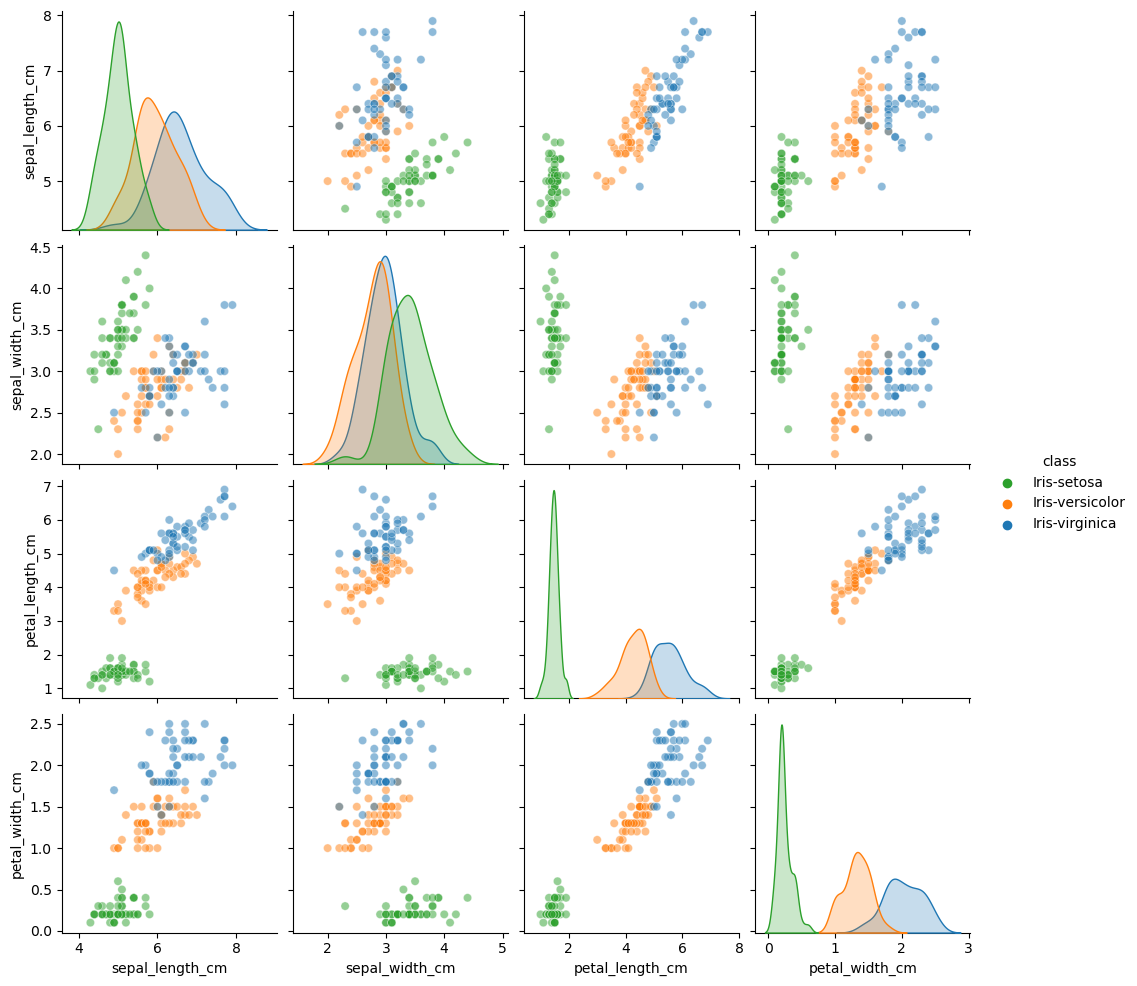

In [101]:
# Main program to create scatter plots.

# Call the user menu function.
choice = user_menu()

# Call pairplot function.
if choice == "a":
    iris_pairplot()

# Call all plots function.
elif choice == "b":
    all_plots()

# Call single plots function.
elif choice == "c":

    # Call x & y variable function.
    x, y = x_y_variables()
    single_plot(x, y)

### 4. Output Scatter Plot with Regression Lines and Coefficients.

This program uses several functions to generate scatter plots for a pair of variables selected by the user. It will output two plots side by side with regression lines. The plot on the left has a regression line that best fits the data points for the total Iris population. The plot on the right has regression lines that best fit the data points for each species of Iris.

The correlation coefficient ($ r $) and coefficient of determination ($ R^{2} $) are also output to the side of the plot.

$ r $ measures the strength and direction of the linear relationship between two variables and ranges from -1 to +1, where a coefficient of either minus or plus 1 indicates perfect correlation.

$ R^{2} $ quantifies how much of variance in one variable is explained by the other variable and ranges from 0 to 1.

In [102]:
# Function to create scatter plots with regression lines
# and add coefficients to plot.
def coefficients_plot(x, y):

    # Get petal lengths and petal widths per class from data set.
    setosa_x = iris[iris["class"] == "Iris-setosa"][x]
    setosa_y = iris[iris["class"] == "Iris-setosa"][y]

    versicolor_x = iris[iris["class"] == "Iris-versicolor"][x]
    versicolor_y = iris[iris["class"] == "Iris-versicolor"][y]

    virginica_x = iris[iris["class"] == "Iris-virginica"][x]
    virginica_y = iris[iris["class"] == "Iris-virginica"][y]

    # Get the coefficents for regression lines with numpy.
    # Adapted from:
    # https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python#adding-a-matplotlib-regression-line-aregr
    iris_coefficients = np.polyfit(iris[x], iris[y], 1)
    best_fit_iris = np.poly1d(iris_coefficients)

    setosa_coefficients = np.polyfit(setosa_x, setosa_y, 1)
    best_fit_setosa = np.poly1d(setosa_coefficients)

    versicolor_coefficients = np.polyfit(versicolor_x, versicolor_y, 1)
    best_fit_versicolor = np.poly1d(versicolor_coefficients)

    virginica_coefficients = np.polyfit(virginica_x, virginica_y, 1)
    best_fit_virginica = np.poly1d(virginica_coefficients)

    # Get the correlation coefficients (r) with numpy.
    iris_r = np.corrcoef(iris[x], iris[y])
    setosa_r = np.corrcoef(setosa_x, setosa_y)
    versicolor_r = np.corrcoef(versicolor_x, versicolor_y)
    virginica_r = np.corrcoef(virginica_x, virginica_y)

    # Get the coefficient of determination (R^2).
    iris_r_sqrd = iris_r ** 2
    setosa_r_sqrd = setosa_r ** 2
    versicolor_r_sqrd = versicolor_r ** 2
    virginica_r_sqrd = virginica_r ** 2

    # Create figure with matplotlib subplots.
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for total iris population.
    ax1.scatter(iris[x], iris[y], label="iris",
                color="tab:purple", alpha=0.5)

    # Add regression line to plot.
    ax1.plot(iris[x], best_fit_iris(iris[x]), "-", color="tab:red",
             label="regression line")

    # Add axis labels.
    ax1.set_xlabel(x)
    ax1.set_ylabel(y)

    # Add legend.
    ax1.legend()

    # Plot setosa.
    ax2.scatter(setosa_x, setosa_y, label="setosa",
                color="tab:green", alpha=0.5)

    # Add regression line.
    ax2.plot(setosa_x, best_fit_setosa(setosa_x), "-",
             color="tab:red")

    # Plot versicolor.
    ax2.scatter(versicolor_x, versicolor_y, label="versicolor",
                color="tab:orange", alpha=0.5)

    # Add regression line.
    ax2.plot(versicolor_x, best_fit_versicolor(versicolor_x), "-",
             color="tab:red")

    # Plot virginica.
    ax2.scatter(virginica_x, virginica_y, label="virginica",
                color="tab:blue", alpha=0.5)

    # Add regression line.
    ax2.plot(virginica_x, best_fit_virginica(virginica_x), "-",
             color="tab:red", label="regression line")

    # Add text box with coefficients to plot.
    # Reference:
    # https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_fontdict.html
    # https://matplotlib.org/stable/users/explain/text/mathtext.html#subscripts-and-superscripts
    # https://matplotlib.org/3.3.4/gallery/recipes/placing_text_boxes.html
    ax2_box = dict(boxstyle="round", facecolor="wheat", alpha=0.5)

    ax2.text(iris[x].max() + 0.5, iris[y].max(0) - 2,
             f"Iris:\n\t$ r $ = {iris_r[0,1:]}\n"
             f"\t$ R^{2} $ = {iris_r_sqrd[0,1:]}\n"
             f"Setosa:\n\t$ r $ = {setosa_r[0,1:]}\n"
             f"\t$ R^{2} $ = {setosa_r_sqrd[0,1:]}\n"
             f"Versicolor:\n\t$ r $ = {versicolor_r[0,1:]}\n"
             f"\t$ R^{2} $ = {versicolor_r_sqrd[0,1:]}\n"
             f"Virginica:\n\t$ r $ = {virginica_r[0,1:]}\n"
             f"\t$ R^{2} $ = {virginica_r_sqrd[0,1:]}",
             size="small", bbox=ax2_box)

    # Add axis labels.
    ax2.set_xlabel(x)
    ax2.set_ylabel(y)

    # Add legend.
    ax2.legend()

    # Add title.
    xtitle = (x.replace("_", " ").replace(" cm", "").title())
    ytitle = (y.replace("_", " ").replace(" cm", "").title())
    fig.suptitle(f"{xtitle} vs {ytitle}", size="x-large", fontweight="bold")

    # Adjust margin.
    # Reference:
    # https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html
    fig.subplots_adjust(right=0.85)

    # Show plot.
    return plt.show()

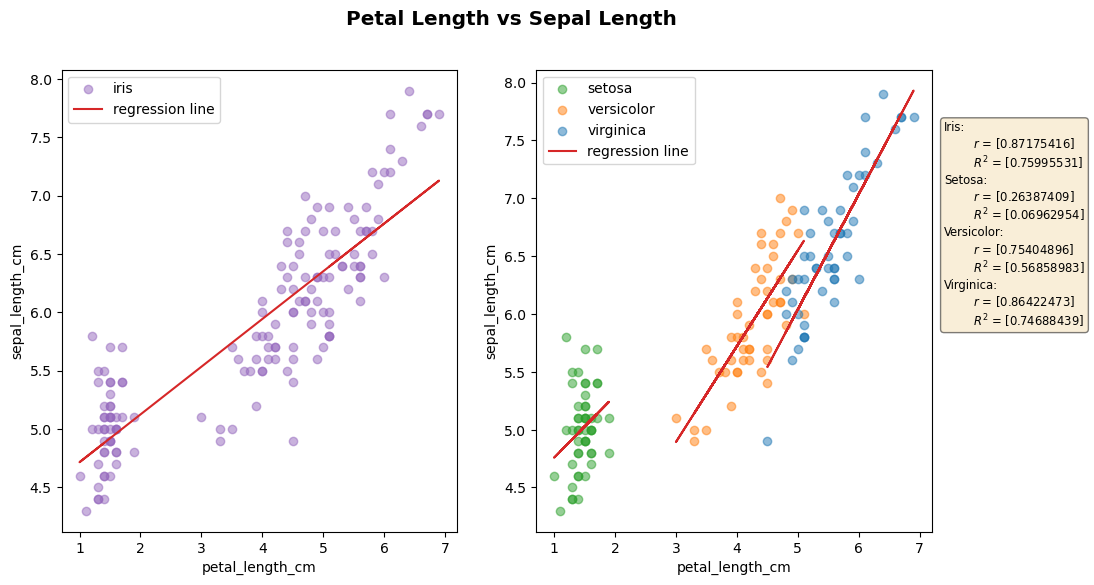

In [103]:
# Main program to generate scatter plots with regression lines.
x, y = x_y_variables()
coefficients_plot(x, y)

## References

Iris dataset:
- [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)
- [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris)

Python modules:
- [pandas](https://pandas.pydata.org/)
- [numpy](https://numpy.org/)
- [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/pyplot.html)
- [seaborn](https://seaborn.pydata.org/index.html)

Regression lines:
- [Datacamp](https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python#adding-a-matplotlib-regression-line-aregr)

Coefficients of Correlation & Determination:
- [StatisticsEasily](https://statisticseasily.com/web-stories/coefficient-of-determination-vs-correlation/)

Pandas:
- [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

Markdown:
- [Markdown Cheat Sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

***
## End